# Estatísticas do Jogos da plataforma Alite

  - This file is part of  program Alite.
  - Copyright © 2023  Carlo Oliveira <carlo@nce.ufrj.br>.
  - [Labase](http://labase.selfip.org) - [NCE](http://portal.nce.ufrj.br) - [UFRJ](http://www.ufrj.br).
  - SPDX-License-Identifier: ([GNU General Public License v3.0 or later](https://www.gnu.org/licenses/gpl-3.0-standalone.html)).

## Version and configurations.

 This module retrieves data and plot statistics for the [Alite - Games](https://games.alite.selfip.org).

## [23.06](https://github.com/labase/data_edu/releases)

### Added

- Preliminary stats on Alite games data.
- Classe adicionada para plotar wisconsin (14).



## Recebe dados dos games de alite e converte para dataframe

In [1]:
import urllib.request, json
import pandas as pd

furl = 'https://games.alite.selfip.org/score/players'
with urllib.request.urlopen(furl) as url:
    data = json.loads(url.read().decode())
    df = pd.DataFrame(data)

df_players = df
print(df)

                                    _id                name   ano       sexo  \
0  ObjectId('6477ce20f626d3cb95e08c8f')               admin  ano1  masculino   
1  ObjectId('6477cf19f626d3cb95e08c92')               outro  ano2   feminino   
2  ObjectId('647b8008f626d3cb95e08c98')         Pedro Lomba  ano9  masculino   
3  ObjectId('647b85f9f626d3cb95e08c9b')              daniel  ano9  masculino   
4  ObjectId('647b86cbf626d3cb95e08c9d')            kduzinho  ano1  masculino   
5  ObjectId('647b8f68f626d3cb95e08c9f')  Carolina Fantinato  ano9   feminino   
6  ObjectId('647fa41a442f27c3f236c16c')              labase  ano1  masculino   

    idade                              time  \
0  anos10  2023-05-31 19:45:52.561244-03:00   
1   anos9  2023-05-31 19:50:01.899904-03:00   
2  anos10  2023-06-03 15:01:44.637563-03:00   
3  anos10  2023-06-03 15:27:05.449207-03:00   
4   anos1  2023-06-03 15:30:35.506478-03:00   
5  anos10  2023-06-03 16:07:20.229405-03:00   
6   anos1  2023-06-06 18:24:42

## Converte lista de dicionários numa lista de nomes dos jogos

In [2]:
dfg = [[g["game"] for g in t] for t in df.games]
# dfg = pd.DataFrame(dfg)
df['games_l'] = [[g["game"] for g in t] for t in df.games]
df

,_id,name,ano,sexo,idade,time,games,games_l
0,ObjectId('6477ce20f626d3cb95e08c8f'),admin,ano1,masculino,anos10,2023-05-31 19:45:52.561244-03:00,"[{'game': 'wcst', 'goal': 0, 'trial': 0, 'scor...","[wcst, game]"
1,ObjectId('6477cf19f626d3cb95e08c92'),outro,ano2,feminino,anos9,2023-05-31 19:50:01.899904-03:00,"[{'game': 'wcst', 'goal': 0, 'trial': 0, 'scor...","[wcst, wcst, game, game]"
2,ObjectId('647b8008f626d3cb95e08c98'),Pedro Lomba,ano9,masculino,anos10,2023-06-03 15:01:44.637563-03:00,"[{'game': 'game', 'goal': 0, 'trial': 0, 'scor...",[game]
3,ObjectId('647b85f9f626d3cb95e08c9b'),daniel,ano9,masculino,anos10,2023-06-03 15:27:05.449207-03:00,"[{'game': 'wcst', 'goal': 0, 'trial': 0, 'scor...",[wcst]
4,ObjectId('647b86cbf626d3cb95e08c9d'),kduzinho,ano1,masculino,anos1,2023-06-03 15:30:35.506478-03:00,"[{'game': 'game', 'goal': 0, 'trial': 0, 'scor...",[game]
5,ObjectId('647b8f68f626d3cb95e08c9f'),Carolina Fantinato,ano9,feminino,anos10,2023-06-03 16:07:20.229405-03:00,"[{'game': 'game', 'goal': 0, 'trial': 0, 'scor...",[game]
6,ObjectId('647fa41a442f27c3f236c16c'),labase,ano1,masculino,anos1,2023-06-06 18:24:42.655420-03:00,"[{'game': 'game', 'goal': 0, 'trial': 0, 'scor...","[game, wcst]"


## Contagem dentra das listas dos jogos

In [3]:
df['eica'] = [sum([1 for g in t  if "game" in g]) for t in df.games_l.tolist()]
df['wcst'] = [sum([1 for g in t  if "wcst" in g]) for t in df.games_l.tolist()]
df

,_id,name,ano,sexo,idade,time,games,games_l,eica,wcst
0,ObjectId('6477ce20f626d3cb95e08c8f'),admin,ano1,masculino,anos10,2023-05-31 19:45:52.561244-03:00,"[{'game': 'wcst', 'goal': 0, 'trial': 0, 'scor...","[wcst, game]",1,1
1,ObjectId('6477cf19f626d3cb95e08c92'),outro,ano2,feminino,anos9,2023-05-31 19:50:01.899904-03:00,"[{'game': 'wcst', 'goal': 0, 'trial': 0, 'scor...","[wcst, wcst, game, game]",2,2
2,ObjectId('647b8008f626d3cb95e08c98'),Pedro Lomba,ano9,masculino,anos10,2023-06-03 15:01:44.637563-03:00,"[{'game': 'game', 'goal': 0, 'trial': 0, 'scor...",[game],1,0
3,ObjectId('647b85f9f626d3cb95e08c9b'),daniel,ano9,masculino,anos10,2023-06-03 15:27:05.449207-03:00,"[{'game': 'wcst', 'goal': 0, 'trial': 0, 'scor...",[wcst],0,1
4,ObjectId('647b86cbf626d3cb95e08c9d'),kduzinho,ano1,masculino,anos1,2023-06-03 15:30:35.506478-03:00,"[{'game': 'game', 'goal': 0, 'trial': 0, 'scor...",[game],1,0
5,ObjectId('647b8f68f626d3cb95e08c9f'),Carolina Fantinato,ano9,feminino,anos10,2023-06-03 16:07:20.229405-03:00,"[{'game': 'game', 'goal': 0, 'trial': 0, 'scor...",[game],1,0
6,ObjectId('647fa41a442f27c3f236c16c'),labase,ano1,masculino,anos1,2023-06-06 18:24:42.655420-03:00,"[{'game': 'game', 'goal': 0, 'trial': 0, 'scor...","[game, wcst]",1,1


## Plotagem dos Jogos jogados por Jogador

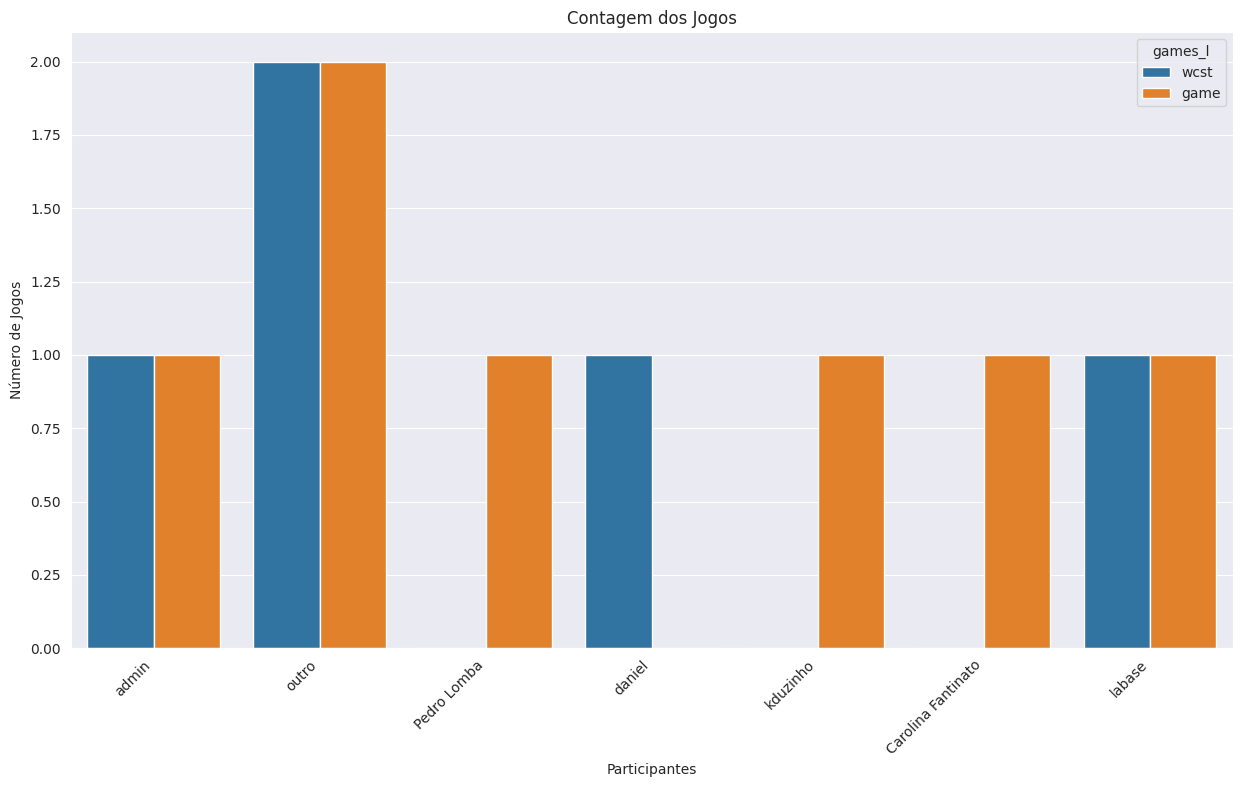

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt
dfx = df.explode('games_l')
# dfm = pd.melt(df, 'games_l')
_ = plt.figure(figsize=(15,8))
chart = sns.countplot(data=dfx, x="name", hue="games_l")
_ = chart.set(title='Contagem dos Jogos', ylabel='Número de Jogos', xlabel="Participantes")
_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


In [5]:
df

,_id,name,ano,sexo,idade,time,games,games_l,eica,wcst
0,ObjectId('6477ce20f626d3cb95e08c8f'),admin,ano1,masculino,anos10,2023-05-31 19:45:52.561244-03:00,"[{'game': 'wcst', 'goal': 0, 'trial': 0, 'scor...","[wcst, game]",1,1
1,ObjectId('6477cf19f626d3cb95e08c92'),outro,ano2,feminino,anos9,2023-05-31 19:50:01.899904-03:00,"[{'game': 'wcst', 'goal': 0, 'trial': 0, 'scor...","[wcst, wcst, game, game]",2,2
2,ObjectId('647b8008f626d3cb95e08c98'),Pedro Lomba,ano9,masculino,anos10,2023-06-03 15:01:44.637563-03:00,"[{'game': 'game', 'goal': 0, 'trial': 0, 'scor...",[game],1,0
3,ObjectId('647b85f9f626d3cb95e08c9b'),daniel,ano9,masculino,anos10,2023-06-03 15:27:05.449207-03:00,"[{'game': 'wcst', 'goal': 0, 'trial': 0, 'scor...",[wcst],0,1
4,ObjectId('647b86cbf626d3cb95e08c9d'),kduzinho,ano1,masculino,anos1,2023-06-03 15:30:35.506478-03:00,"[{'game': 'game', 'goal': 0, 'trial': 0, 'scor...",[game],1,0
5,ObjectId('647b8f68f626d3cb95e08c9f'),Carolina Fantinato,ano9,feminino,anos10,2023-06-03 16:07:20.229405-03:00,"[{'game': 'game', 'goal': 0, 'trial': 0, 'scor...",[game],1,0
6,ObjectId('647fa41a442f27c3f236c16c'),labase,ano1,masculino,anos1,2023-06-06 18:24:42.655420-03:00,"[{'game': 'game', 'goal': 0, 'trial': 0, 'scor...","[game, wcst]",1,1


## Converte ObjectId para Identificador

In [6]:
import re
matches = [re.findall(r"'(.+?)'",text)[0] for text in df._id.to_list()]
df["oid"] = matches
dfo = df
df.oid[1]

'6477cf19f626d3cb95e08c92'

## Testa a recuperação dos dados de um jogador

In [7]:
import urllib.request, json
import pandas as pd

furl = 'https://games.alite.selfip.org/score/player?oid=6477cf19f626d3cb95e08c92'
with urllib.request.urlopen(furl) as url:
    data = json.loads(url.read().decode())
    df = pd.DataFrame(data)
print(df)

                                    _id   name   ano      sexo  idade  \
0  ObjectId('6477cf19f626d3cb95e08c92')  outro  ano2  feminino  anos9   
1  ObjectId('6477cf19f626d3cb95e08c92')  outro  ano2  feminino  anos9   
2  ObjectId('6477cf19f626d3cb95e08c92')  outro  ano2  feminino  anos9   
3  ObjectId('6477cf19f626d3cb95e08c92')  outro  ano2  feminino  anos9   

                               time  \
0  2023-05-31 19:50:01.899904-03:00   
1  2023-05-31 19:50:01.899904-03:00   
2  2023-05-31 19:50:01.899904-03:00   
3  2023-05-31 19:50:01.899904-03:00   

                                               games  
0  {'game': 'wcst', 'goal': 0, 'trial': 0, 'score...  
1  {'game': 'wcst', 'goal': 0, 'trial': 1, 'score...  
2  {'game': 'game', 'goal': 0, 'trial': 0, 'score...  
3  {'game': 'game', 'goal': 0, 'trial': 1, 'score...  


## Limpeza dos dados dos games

In [8]:
df0 = pd.DataFrame(df.games.to_list())
df0
# df.games

,game,goal,trial,scorer
0,wcst,0,0,ObjectId('6477cf1df626d3cb95e08c93')
1,wcst,0,1,ObjectId('6477cf29f626d3cb95e08c94')
2,game,0,0,ObjectId('6477cf31f626d3cb95e08c95')
3,game,0,1,ObjectId('6477cf53f626d3cb95e08c96')


## Obtém o identificador de pontuação em formato texto

In [9]:
df0['score'] = [re.findall(r"'(.+?)'",text)[0] for text in df0.scorer.to_list()]
df0

,game,goal,trial,scorer,score
0,wcst,0,0,ObjectId('6477cf1df626d3cb95e08c93'),6477cf1df626d3cb95e08c93
1,wcst,0,1,ObjectId('6477cf29f626d3cb95e08c94'),6477cf29f626d3cb95e08c94
2,game,0,0,ObjectId('6477cf31f626d3cb95e08c95'),6477cf31f626d3cb95e08c95
3,game,0,1,ObjectId('6477cf53f626d3cb95e08c96'),6477cf53f626d3cb95e08c96


## Recupera os dados de jogadas de um jogador

In [10]:
import urllib.request, json
import pandas as pd

furl = 'https://games.alite.selfip.org/score/games?oid=6477cf19f626d3cb95e08c92'
with urllib.request.urlopen(furl) as url:
    data = json.loads(url.read().decode())
    dfg = pd.DataFrame(data)
print(dfg)

                                    _id   name  game  goal  trial  \
0  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      0   
1  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      1   
2  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      0   
3  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      1   

                                              scorer  
0  [{'carta': 0, 'casa': 'no no no', 'move': 'no ...  
1  [{'carta': 0, 'casa': 'no no no', 'move': 'no ...  
2  [{'carta': '__I_N_I_T__', 'casa': '0_0', 'move...  
3  [{'carta': '__I_N_I_T__', 'casa': '0_0', 'move...  


## Expande a lista interna de games e transforma em colunas

In [11]:
dfx = dfg.explode('scorer')
dfxx = dfx.drop(columns=["scorer"], inplace=False).join(
    dfx.apply(lambda x: pd.Series(x["scorer"].values(), index=x["scorer"].keys()), axis=1))
dfxx

,_id,name,game,goal,trial,carta,casa,move,ponto,valor,time
0,ObjectId('6477cf19f626d3cb95e08c92'),outro,wcst,0,0,0,no no no,no no no,000,0000,2023-05-31 19:50:05.437000
0,ObjectId('6477cf19f626d3cb95e08c92'),outro,wcst,0,0,1,Duas Estrelas Verdes,Um Triângulo Verde,100,1000,2023-05-31 19:50:08.186000
0,ObjectId('6477cf19f626d3cb95e08c92'),outro,wcst,0,0,2,Um Triângulo Vermelho,Quatro Cruzes Vermelhas,200,1000,2023-05-31 19:50:10.643000
0,ObjectId('6477cf19f626d3cb95e08c92'),outro,wcst,0,0,0,no no no,no no no,000,0000,2023-05-31 19:50:05.437000
0,ObjectId('6477cf19f626d3cb95e08c92'),outro,wcst,0,0,1,Duas Estrelas Verdes,Um Triângulo Verde,100,1000,2023-05-31 19:50:08.186000
0,ObjectId('6477cf19f626d3cb95e08c92'),outro,wcst,0,0,2,Um Triângulo Vermelho,Quatro Cruzes Vermelhas,200,1000,2023-05-31 19:50:10.643000
0,ObjectId('6477cf19f626d3cb95e08c92'),outro,wcst,0,0,0,no no no,no no no,000,0000,2023-05-31 19:50:05.437000
0,ObjectId('6477cf19f626d3cb95e08c92'),outro,wcst,0,0,1,Duas Estrelas Verdes,Um Triângulo Verde,100,1000,2023-05-31 19:50:08.186000
0,ObjectId('6477cf19f626d3cb95e08c92'),outro,wcst,0,0,2,Um Triângulo Vermelho,Quatro Cruzes Vermelhas,200,1000,2023-05-31 19:50:10.643000
1,ObjectId('6477cf19f626d3cb95e08c92'),outro,wcst,0,1,0,no no no,no no no,000,0000,2023-05-31 19:50:17.902000


In [12]:
dfxl = pd.DataFrame(dfx.scorer.values.tolist())
dfx = dfx.drop(columns=["scorer"], inplace=False).reset_index()
dfxj = dfx.join(dfxl)
dfxj

,index,_id,name,game,goal,trial,carta,casa,move,ponto,valor,time
0,0,ObjectId('6477cf19f626d3cb95e08c92'),outro,wcst,0,0,0,no no no,no no no,000,0000,2023-05-31 19:50:05.437000
1,0,ObjectId('6477cf19f626d3cb95e08c92'),outro,wcst,0,0,1,Duas Estrelas Verdes,Um Triângulo Verde,100,1000,2023-05-31 19:50:08.186000
2,0,ObjectId('6477cf19f626d3cb95e08c92'),outro,wcst,0,0,2,Um Triângulo Vermelho,Quatro Cruzes Vermelhas,200,1000,2023-05-31 19:50:10.643000
3,1,ObjectId('6477cf19f626d3cb95e08c92'),outro,wcst,0,1,0,no no no,no no no,000,0000,2023-05-31 19:50:17.902000
4,1,ObjectId('6477cf19f626d3cb95e08c92'),outro,wcst,0,1,1,Duas Estrelas Verdes,Um Triângulo Verde,100,1000,2023-05-31 19:50:19.704000
5,1,ObjectId('6477cf19f626d3cb95e08c92'),outro,wcst,0,1,2,Três Cruzes Amarelas,Quatro Cruzes Vermelhas,000,0100,2023-05-31 19:50:21.429000
6,2,ObjectId('6477cf19f626d3cb95e08c92'),outro,game,0,0,__I_N_I_T__,0_0,ok,_INIT_,True,2023-05-31 19:50:26.703999
7,2,ObjectId('6477cf19f626d3cb95e08c92'),outro,game,0,0,__A_T_I_V_A__,0_0,ok,_LINGUA_,True,2023-05-31 19:50:30.453999
8,2,ObjectId('6477cf19f626d3cb95e08c92'),outro,game,0,0,34_10_14,0_0,ok,_FALA_,True,2023-05-31 19:50:35.878000
9,2,ObjectId('6477cf19f626d3cb95e08c92'),outro,game,0,0,30_46_31,0_0,ok,_FALA_,True,2023-05-31 19:50:52.269999


# Recuperação e plotagem das jogadas

## Pedido dos dados ao servidor e converte num arcabouço de dados

In [13]:
import urllib.request, json
import pandas as pd
furl = 'https://games.alite.selfip.org/score/games?oid={}'
dfa = pd.DataFrame()
dfl = []

def retrieve_games(player):
    global dfl
    with urllib.request.urlopen(furl.format(player)) as urlp:
        dfl.extend(json.loads(urlp.read().decode()))
def process_df():
    dfg_ = pd.DataFrame(dfl)

    dfx_ = dfg_.explode('scorer')
    dfxl_ = pd.DataFrame(dfx_.scorer.values.tolist())
    dfx_ = dfx_.drop(columns=["scorer"], inplace=False).reset_index()
    return dfx_.join(dfxl_)
# retrieve_games('6477cf19f626d3cb95e08c92')
games = [retrieve_games(oid) for oid in dfo.oid.to_list()]
print(dfl)
# dfa = process_df()
# dfa

[{'_id': "ObjectId('6477ce20f626d3cb95e08c8f')", 'name': 'admin', 'game': 'wcst', 'goal': 0, 'trial': 0, 'scorer': [{'carta': 0, 'casa': 'no no no', 'move': 'no no no', 'ponto': '000', 'valor': '0000', 'time': '2023-05-31 19:46:43.649000'}, {'carta': 1, 'casa': 'Duas Estrelas Verdes', 'move': 'Um Triângulo Verde', 'ponto': '100', 'valor': '1000', 'time': '2023-05-31 19:46:49.652000'}]}, {'_id': "ObjectId('6477ce20f626d3cb95e08c8f')", 'name': 'admin', 'game': 'game', 'goal': 0, 'trial': 0, 'scorer': [{'carta': '__I_N_I_T__', 'casa': '0_0', 'move': 'ok', 'ponto': '_INIT_', 'valor': True, 'time': '2023-05-31 19:49:01.943000'}, {'carta': '__A_T_I_V_A__', 'casa': '0_0', 'move': 'ok', 'ponto': '_CHAVES_', 'valor': True, 'time': '2023-05-31 19:49:08.206000'}, {'carta': 'minitens', 'casa': '400_520', 'move': 'ok', 'ponto': '_ABAS_', 'valor': 'minitens', 'time': '2023-05-31 19:49:11.043999'}, {'carta': '6', 'casa': '420_160', 'move': 'ok', 'ponto': '_Chaves_', 'valor': True, 'time': '2023-05-31

## Gera o arcabouço de dados das jogadas

In [14]:
dfa = process_df()

dfa

,index,_id,name,game,goal,trial,carta,casa,move,ponto,valor,time
0,0,ObjectId('6477ce20f626d3cb95e08c8f'),admin,wcst,0,0,0,no no no,no no no,000,0000,2023-05-31 19:46:43.649000
1,0,ObjectId('6477ce20f626d3cb95e08c8f'),admin,wcst,0,0,1,Duas Estrelas Verdes,Um Triângulo Verde,100,1000,2023-05-31 19:46:49.652000
2,1,ObjectId('6477ce20f626d3cb95e08c8f'),admin,game,0,0,__I_N_I_T__,0_0,ok,_INIT_,True,2023-05-31 19:49:01.943000
3,1,ObjectId('6477ce20f626d3cb95e08c8f'),admin,game,0,0,__A_T_I_V_A__,0_0,ok,_CHAVES_,True,2023-05-31 19:49:08.206000
4,1,ObjectId('6477ce20f626d3cb95e08c8f'),admin,game,0,0,minitens,400_520,ok,_ABAS_,minitens,2023-05-31 19:49:11.043999
...,...,...,...,...,...,...,...,...,...,...,...,...
118,11,ObjectId('647fa41a442f27c3f236c16c'),labase,wcst,0,0,7,Um Triângulo Vermelho,Quatro Triângulos Azuis,000,0100,2023-06-06 18:26:07.736000
119,11,ObjectId('647fa41a442f27c3f236c16c'),labase,wcst,0,0,8,Um Triângulo Vermelho,Três Círculos Vermelhos,100,1000,2023-06-06 18:26:23.601000
120,11,ObjectId('647fa41a442f27c3f236c16c'),labase,wcst,0,0,9,Duas Estrelas Verdes,Quatro Cruzes Verdes,200,1000,2023-06-06 18:26:26.584000
121,11,ObjectId('647fa41a442f27c3f236c16c'),labase,wcst,0,0,10,Três Cruzes Amarelas,Dois Círculos Amarelos,300,1000,2023-06-06 18:26:30.253000


## Separa os dados do Wisconsin

In [15]:
dfwc = dfa.loc[dfa['game'] == 'wcst']
dfwc

,index,_id,name,game,goal,trial,carta,casa,move,ponto,valor,time
0,0,ObjectId('6477ce20f626d3cb95e08c8f'),admin,wcst,0,0,0,no no no,no no no,000,0000,2023-05-31 19:46:43.649000
1,0,ObjectId('6477ce20f626d3cb95e08c8f'),admin,wcst,0,0,1,Duas Estrelas Verdes,Um Triângulo Verde,100,1000,2023-05-31 19:46:49.652000
10,2,ObjectId('6477cf19f626d3cb95e08c92'),outro,wcst,0,0,0,no no no,no no no,000,0000,2023-05-31 19:50:05.437000
11,2,ObjectId('6477cf19f626d3cb95e08c92'),outro,wcst,0,0,1,Duas Estrelas Verdes,Um Triângulo Verde,100,1000,2023-05-31 19:50:08.186000
12,2,ObjectId('6477cf19f626d3cb95e08c92'),outro,wcst,0,0,2,Um Triângulo Vermelho,Quatro Cruzes Vermelhas,200,1000,2023-05-31 19:50:10.643000
13,3,ObjectId('6477cf19f626d3cb95e08c92'),outro,wcst,0,1,0,no no no,no no no,000,0000,2023-05-31 19:50:17.902000
14,3,ObjectId('6477cf19f626d3cb95e08c92'),outro,wcst,0,1,1,Duas Estrelas Verdes,Um Triângulo Verde,100,1000,2023-05-31 19:50:19.704000
15,3,ObjectId('6477cf19f626d3cb95e08c92'),outro,wcst,0,1,2,Três Cruzes Amarelas,Quatro Cruzes Vermelhas,000,0100,2023-05-31 19:50:21.429000
49,7,ObjectId('647b85f9f626d3cb95e08c9b'),daniel,wcst,0,0,0,no no no,no no no,000,0000,2023-06-03 15:26:59.106000
50,7,ObjectId('647b85f9f626d3cb95e08c9b'),daniel,wcst,0,0,1,Quatro Círculos Azuis,Um Triângulo Verde,011,0000,2023-06-03 15:27:22.843000


## Gráfico de contagem de pontos no Wisc

### Classe para concentrar as operações de arcabouço

None


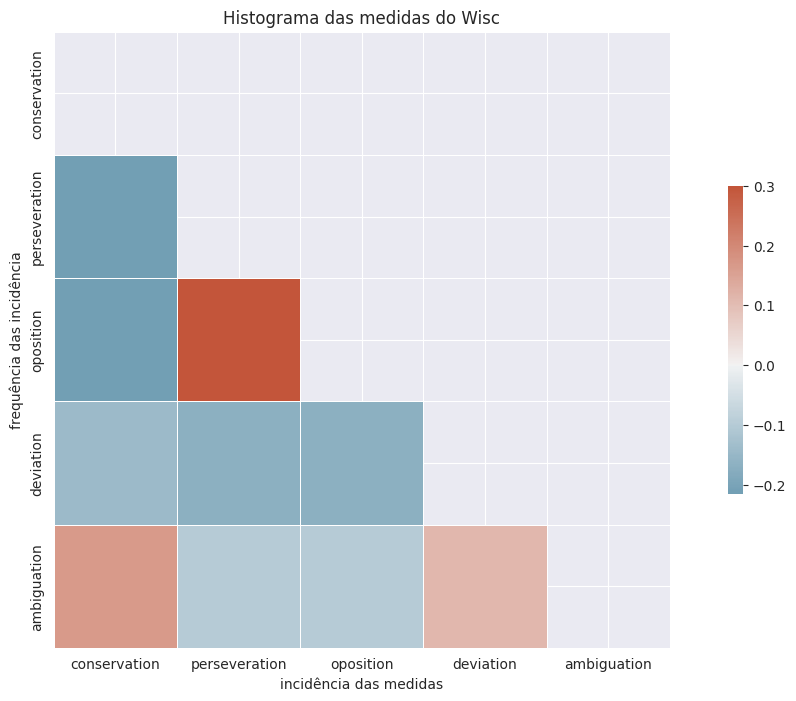

In [39]:
from pandas import DataFrame
from collections import namedtuple
class WiscPlot:
    Cfplot = namedtuple("Cfplot", "col title ylabel xlabel")
    Pnt = namedtuple("Pnt", "ok no td")
    Val = namedtuple("Val", "cc cf cn ct")
    def __init__(self, game_url='https://games.alite.selfip.org/score/games?oid={}'):
        self.game_url = game_url
        self.df: DataFrame = DataFrame()
        self.game_data = []
        self.count = 0

    def retrieve_games(self, player):
        with urllib.request.urlopen(self.game_url.format(player)) as urlp:
            self.game_data.extend(json.loads(urlp.read().decode()))

    def process_df(self):
        dfg_ = pd.DataFrame(self.game_data)
        dfg_ = dfg_.loc[dfg_['game'] == 'wcst']
        dfx_ = dfg_.explode('scorer')
        dfl_ = pd.DataFrame(dfx_.scorer.values.tolist())
        dfx_ = dfx_.drop(columns=["scorer"], inplace=False).reset_index()
        return dfx_.join(dfl_)
    # retrieve_games('6477cf19f626d3cb95e08c92')
    def get_all_games(self, player_oids):
        _ = [self.retrieve_games(oid) for oid in player_oids]
        # print(self.game_data)
        self.df = self.process_df()

    def rerieve_oid_from_person_df(self, person_df):
        import re
        oid_list = [re.findall(r"'(.+?)'",text)[0] for text in person_df._id.to_list()]
        # print("rerieve_oid_from_person_df", oid_list)
        self.get_all_games(oid_list)
        return self

    def refine_point_value_info(self):
        def counter(a, b):
            a, b = int(a), int(b)
            self.count += (1 if a else 0)
            count, self.count = self.count if not b else 0 , 0 if not b else self.count
            return count
        def joiner(k, t, w):
            k, t = int(k), int(t)
            return int(int(t!=w)*2**w*k)
        def bother(c, f, n, t):
            c, f, n, t = int(c), int(f), int(n), int(t)
            all_k = [c, f, n]
            target = all_k.pop(t)
            return target * sum(all_k)
        point_list = [self.Pnt(*list(text)) for text in self.df.ponto.to_list()]
        new_list = point_list[1:]+[self.Pnt(0, 0, 0)]
        val_list0 = [self.Val(*list(text)) for text in self.df.valor.to_list()]
        val_list = [joiner(val.cc, val.ct, 0) + joiner(val.cf, val.ct, 1) + joiner(val.cn, val.ct, 2)  for val in val_list0]
        val_listn = val_list[1:]+[0]
        conserve = [(int(a.ok)) for a, b in zip(point_list, new_list)]
        conservation = [counter(a.ok, b.ok) for a, b in zip(point_list, new_list)]
        perseveration = [counter(a.no, b.no) for a, b in zip(point_list, new_list)]
        oposition = [counter(a.td, b.td) for a, b in zip(point_list, new_list)]
        deviation = [counter(a, b) for a, b in zip(val_list, val_listn)]
        ambiguation = [bother(c, f, n, t) for c, f, n, t in val_list0]
        # print("refine_point_info", conserve)
        # print("refine_point_infoc", conservation)
        # print("refine_val_infof", ambiguation)
        # # print("refine_point_infon", alterationn)
        zipped = list(zip(conservation, perseveration, oposition, deviation, ambiguation))
        df__ = pd.DataFrame(zipped, columns='conservation perseveration oposition deviation ambiguation'.split())
        _df = self.df.drop(columns='game goal trial carta casa move time ponto valor'.split(), inplace=False).reset_index()
        _df = _df.join(df__).drop(columns='level_0 index _id'.split(), inplace=False)
        # self.df = _df
        return _df

    def plot(self, cfg: Cfplot):
        import seaborn as sbn
        from matplotlib import pyplot as plt_
        _ = plt_.figure(figsize=(15,8))
        chart_ = sbn.countplot(data=self.df, x="name", hue=cfg.col)
        _ = chart_.set(title=cfg.title, ylabel=cfg.ylabel, xlabel=cfg.xlabel)
        _ = chart_.set_xticklabels(chart_.get_xticklabels(), rotation=45, horizontalalignment='right')

    def factorplot(self, cfg: Cfplot):
        import seaborn as sbn
        from matplotlib import pyplot as plt_
        f = plt_.figure(figsize=(15,8))
        # ax = f.add_subplot(1,1,1)
        df_ = self.refine_point_value_info()
        df_ = pd.melt(df_, id_vars="name", var_name="measure", value_name="incidence")

        chart_ = sbn.catplot(x='name', y='incidence', hue='measure', data=df_, kind='bar')
        _ = chart_.set(title=cfg.title, ylabel=cfg.ylabel, xlabel=cfg.xlabel)
        # _ = chart_.set_xticklabels(chart_.get_xticklabels(), rotation=45, horizontalalignment='right')

    def violinplot(self, cfg: Cfplot):
        import seaborn as sbn
        from matplotlib import pyplot as plt_
        f = plt_.figure(figsize=(15,8))
        # ax = f.add_subplot(1,1,1)
        df_ = self.refine_point_value_info()
        df_ = pd.melt(df_, id_vars="name", var_name="measure", value_name="incidence")

        chart_ = sbn.violinplot(x='name', y='incidence', hue='measure', inner="quart", data=df_)
        _ = chart_.set(title=cfg.title, ylabel=cfg.ylabel, xlabel=cfg.xlabel)
        # _ = chart_.set_xticklabels(chart_.get_xticklabels(), rotation=45, horizontalalignment='right')

    def histplot(self, cfg: Cfplot):
        import seaborn as sbn
        from matplotlib import pyplot as plt_
        f = plt_.figure(figsize=(15,8))
        ax = f.add_subplot(1,1,1)
        df_ = self.refine_point_value_info()
        df_ = pd.melt(df_, id_vars="name", var_name="measure", value_name="incidence")
        chart_ = sns.histplot(data=df_, stat="count", multiple="stack",
             x="incidence", kde=False,
             palette="pastel", hue="measure",
             element="bars", legend=True)
        ax.set(xlim=(1, None), ylim=(0, 30))

        _ = chart_.set(title=cfg.title, ylabel=cfg.ylabel, xlabel=cfg.xlabel)
        # _ = chart_.set_xticklabels(chart_.get_xticklabels(), rotation=45, horizontalalignment='right')

    def heatmap(self, cfg: Cfplot):
        import seaborn as sbn
        from matplotlib import pyplot as plt_
        f = plt_.figure(figsize=(15,8))
        # ax = f.add_subplot(1,1,1)
        df_ = self.refine_point_value_info()
        df_ = df_.drop(columns=['name'], inplace=False)
        # Compute the correlation matrix
        corr = df_.corr()
        # Generate a mask for the upper triangle
        mask = np.triu(np.ones_like(corr, dtype=bool))
        # Generate a custom diverging colormap
        cmap = sns.diverging_palette(230, 20, as_cmap=True)
        # Draw the heatmap with the mask and correct aspect ratio
        chart_ = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                    square=True, linewidths=.5, cbar_kws={"shrink": .5})
        _ = chart_.set(title=cfg.title, ylabel=cfg.ylabel, xlabel=cfg.xlabel)

# out = WiscPlot().rerieve_oid_from_person_df(df_players).refine_point_value_info()
conf0 = WiscPlot.Cfplot(
     col='ponto', title='Contagem dos Pontos Wisc', ylabel='Contagem de Pontos', xlabel="Participantes")
# out = WiscPlot().rerieve_oid_from_person_df(df_players).factorplot(conf)
conf = WiscPlot.Cfplot(
     col='ponto', title='Histograma das medidas do Wisc', ylabel='frequência das incidência', xlabel="incidência das medidas")
# out = WiscPlot().rerieve_oid_from_person_df(df_players).histplot(conf)
# out = WiscPlot().rerieve_oid_from_person_df(df_players).violinplot(conf)
out = WiscPlot().rerieve_oid_from_person_df(df_players).heatmap(conf)
# out = WiscPlot().rerieve_oid_from_person_df(df_players).plot(conf)
print(out)

### Plotagem das contagens dos valores do Wiconsin

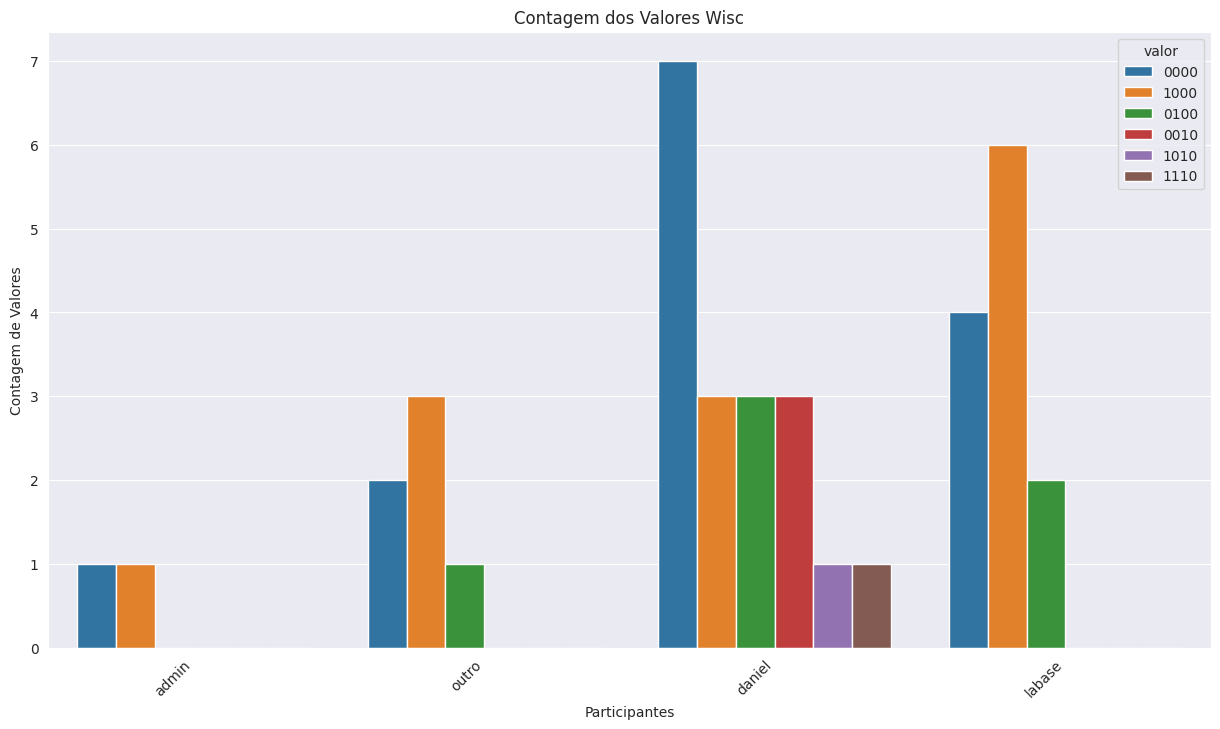

In [49]:
conf = WiscPlot.Cfplot(
     col='valor', title='Contagem dos Valores Wisc', ylabel='Contagem de Valores', xlabel="Participantes")
out = WiscPlot().rerieve_oid_from_person_df(df_players).plot(conf)


### Plotagem das contagens dos pontos do Wiconsin

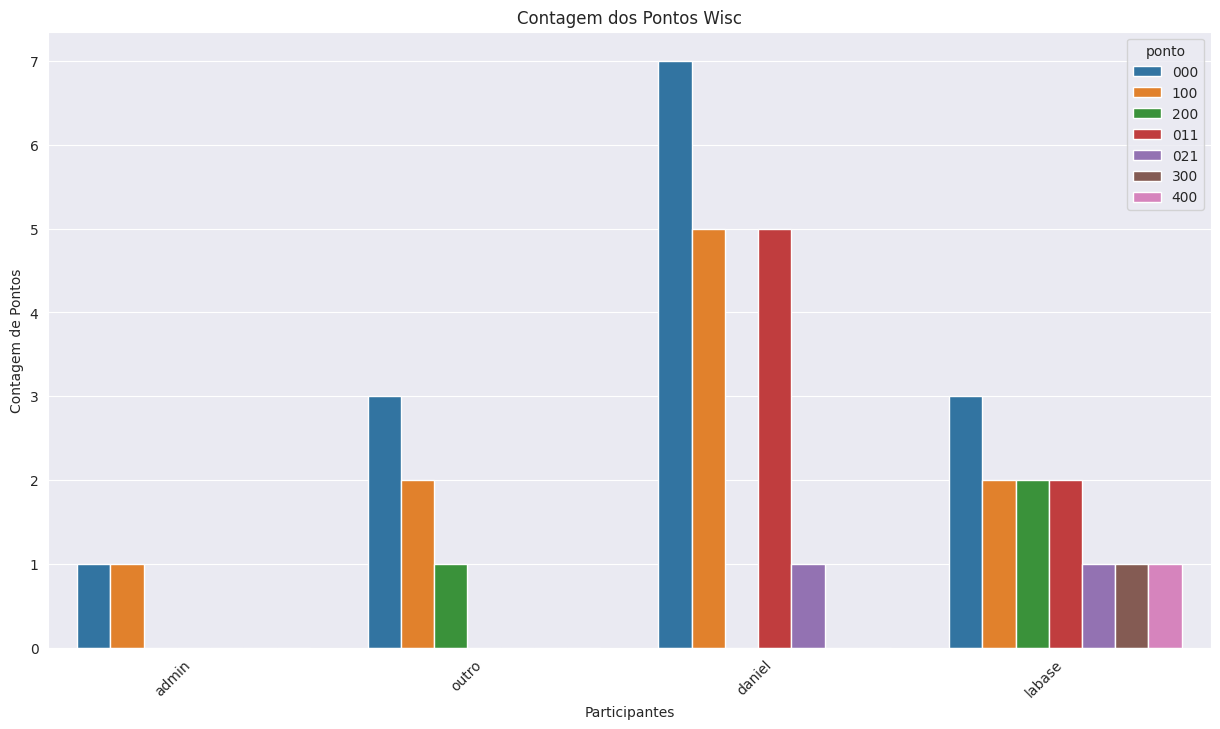

In [48]:
conf = WiscPlot.Cfplot(
     col='ponto', title='Contagem dos Pontos Wisc', ylabel='Contagem de Pontos', xlabel="Participantes")
out = WiscPlot().rerieve_oid_from_person_df(df_players).plot(conf)


### Gráfico dos fatores das medidas do Wiconsin

<Figure size 1500x800 with 0 Axes>

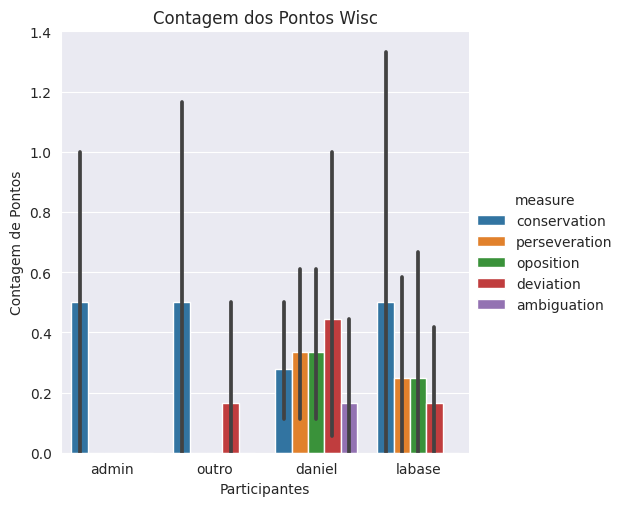

In [41]:
conf = WiscPlot.Cfplot(
     col='ponto', title='Contagem dos Pontos Wisc', ylabel='Contagem de Pontos', xlabel="Participantes")
out = WiscPlot().rerieve_oid_from_person_df(df_players).factorplot(conf)


### Gráfico de violino das medidas do Wiconsin

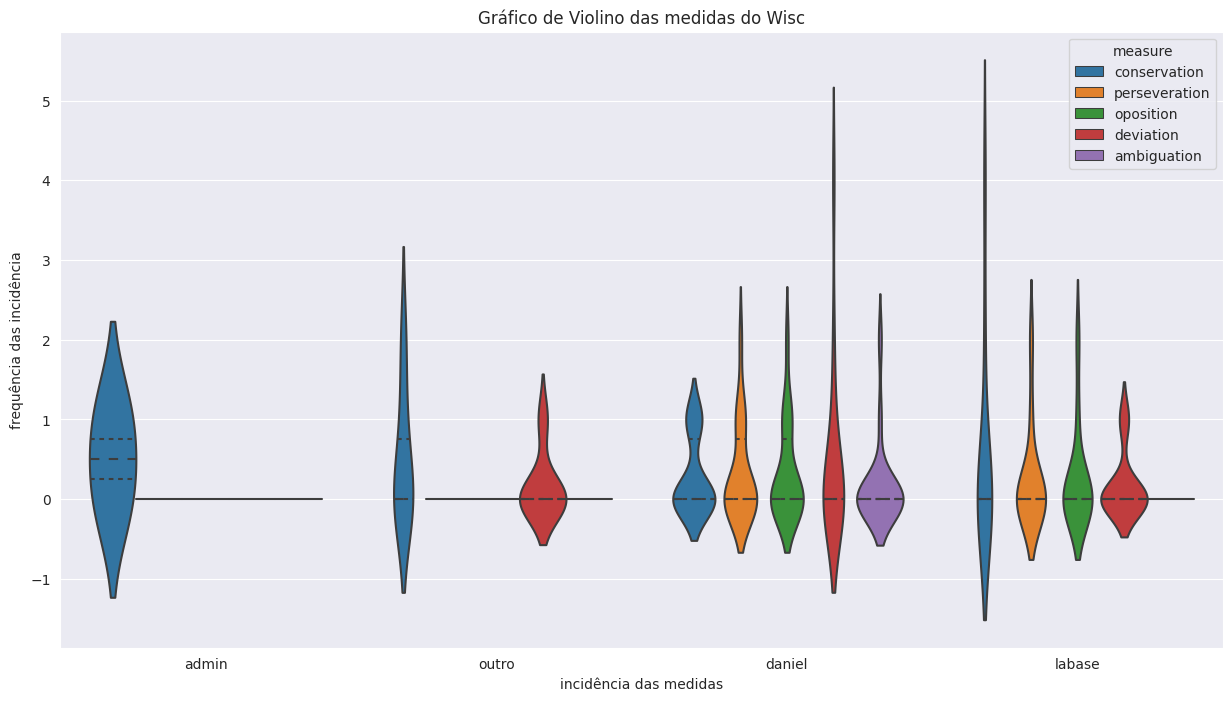

In [42]:
conf = WiscPlot.Cfplot(
    col='ponto', title='Gráfico de Violino das medidas do Wisc', ylabel='frequência das incidência',
    xlabel="incidência das medidas")
out = WiscPlot().rerieve_oid_from_person_df(df_players).violinplot(conf)


### Histograma das medidas do Wiconsin

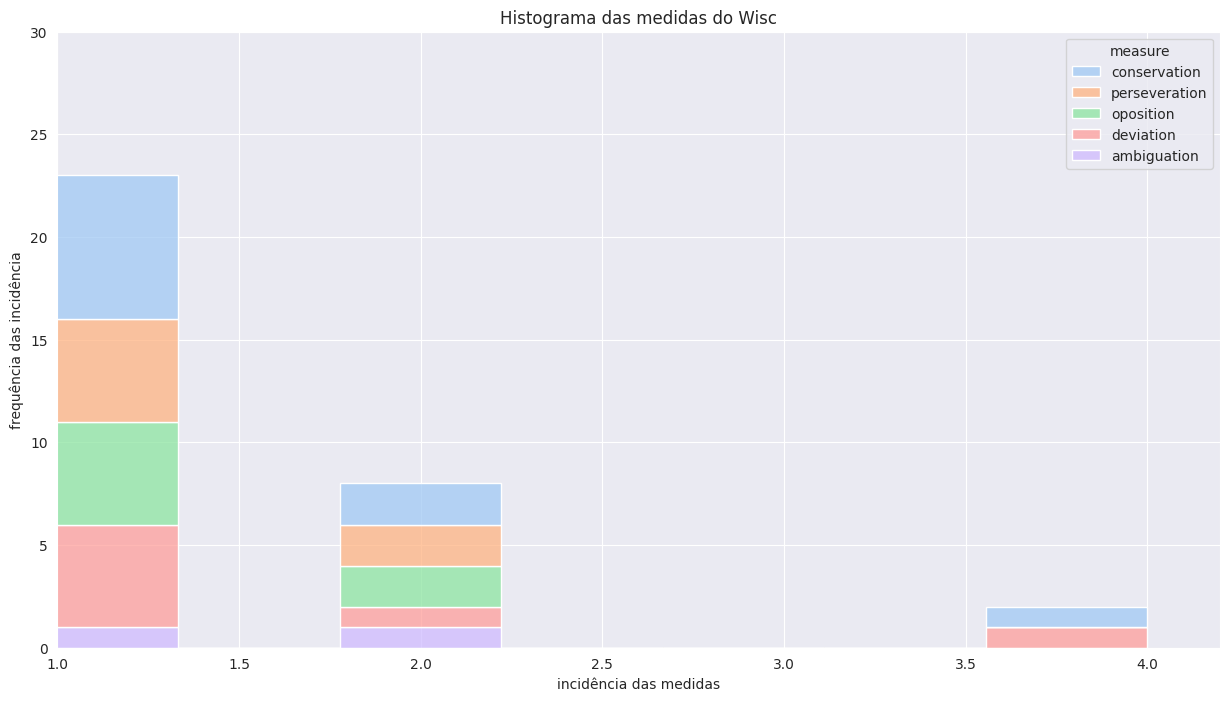

In [43]:
conf = WiscPlot.Cfplot(
     col='ponto', title='Histograma das medidas do Wisc', ylabel='frequência das incidência', xlabel="incidência das medidas")
out = WiscPlot().rerieve_oid_from_person_df(df_players).histplot(conf)


### Correlação das medidas do Wiconsin

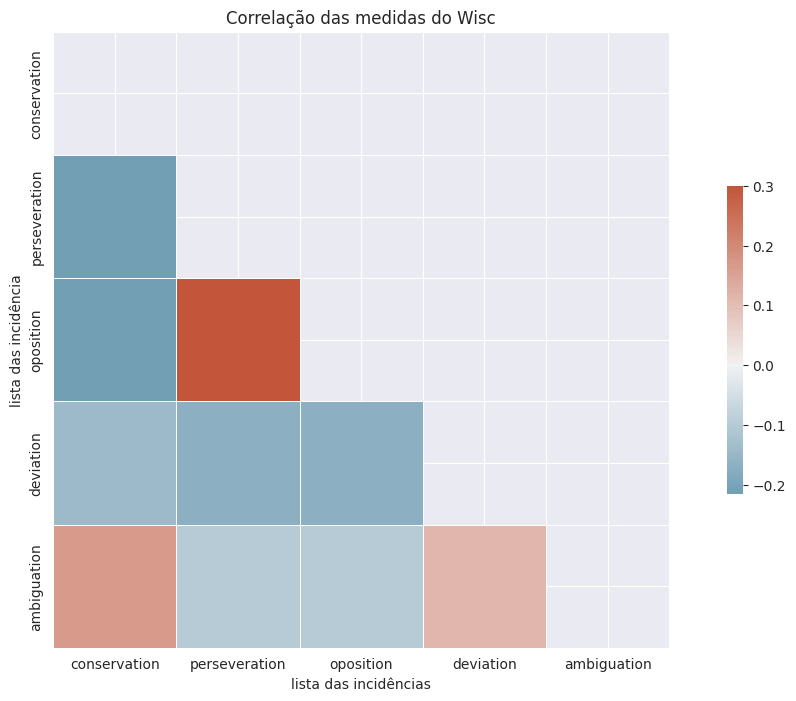

In [44]:
conf = WiscPlot.Cfplot(
     col='ponto', title='Correlação das medidas do Wisc', ylabel='lista das incidência', xlabel="lista das incidências")
out = WiscPlot().rerieve_oid_from_person_df(df_players).heatmap(conf)


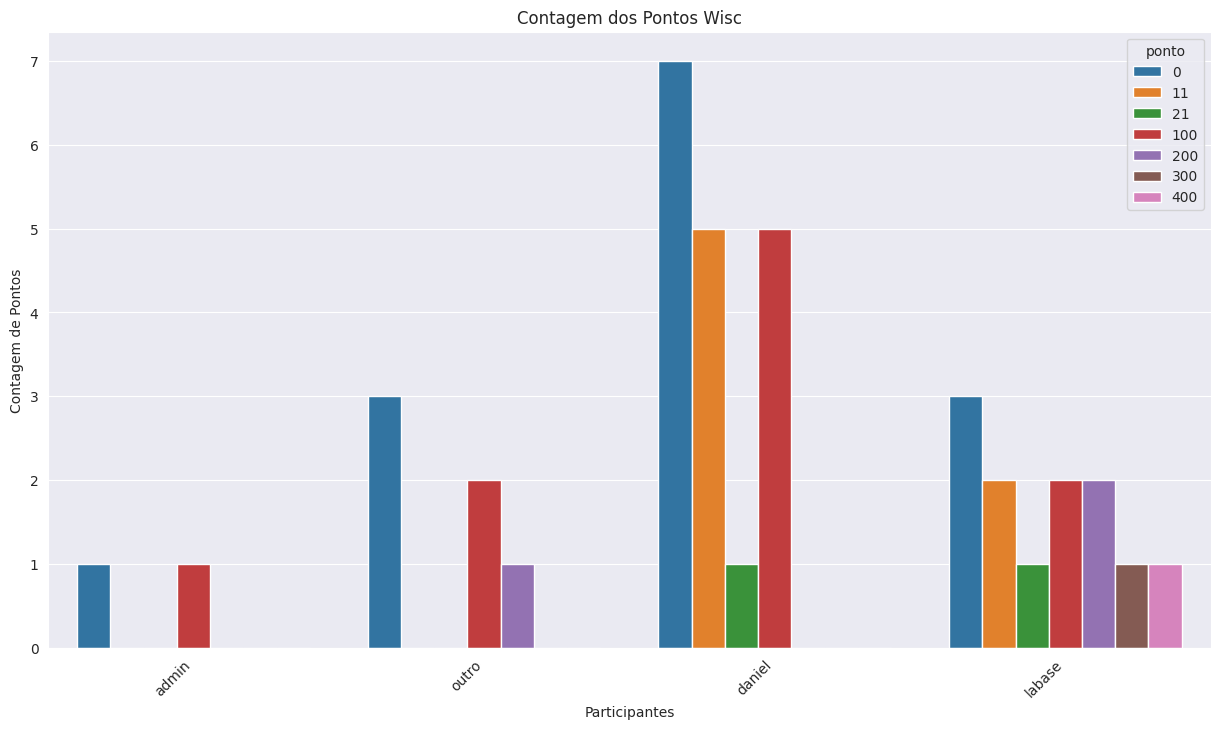

In [45]:
import seaborn as sns
from matplotlib import pyplot as plt
_ = plt.figure(figsize=(15,8))
chart = sns.countplot(data=dfwc, x="name", hue="ponto")
_ = chart.set(title='Contagem dos Pontos Wisc', ylabel='Contagem de Pontos', xlabel="Participantes")
_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

## Gráfico de distribuição dos pontos no Wisc

<Figure size 1500x800 with 0 Axes>

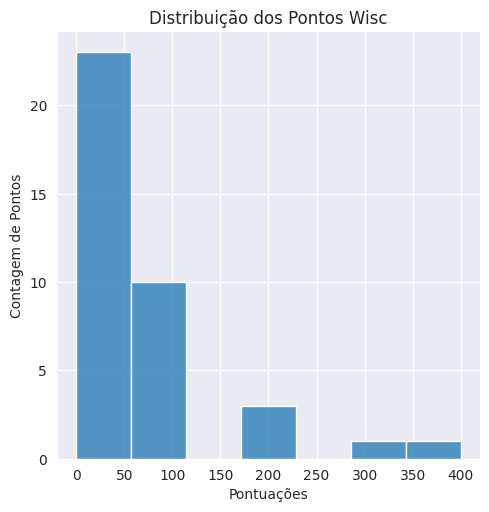

In [46]:
import seaborn as sns
from matplotlib import pyplot as plt
pd.to_numeric(dfwc.ponto)
_ = plt.figure(figsize=(15,8))
chart = sns.displot(data=dfwc, x="ponto")
_ = chart.set(title='Distribuição dos Pontos Wisc', ylabel='Contagem de Pontos', xlabel="Pontuações")

## Gráfico da distribuição dos valores no Wisc

<Figure size 1500x800 with 0 Axes>

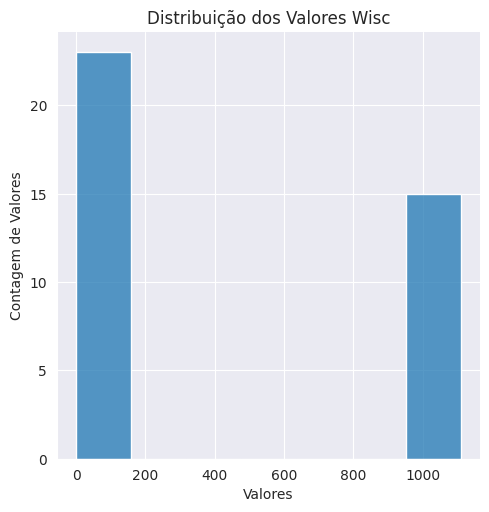

In [47]:
import seaborn as sns
from matplotlib import pyplot as plt
pd.to_numeric(dfwc.ponto)
_ = plt.figure(figsize=(15,8))
chart = sns.displot(data=dfwc, x="valor")
_ = chart.set(title='Distribuição dos Valores Wisc', ylabel='Contagem de Valores', xlabel="Valores")

## Gráfico da correlação entre pontos e valores no Wisc

/tmp/ipykernel_154083/1866397003.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfwc[cols] = dfwc[cols].apply(pd.to_numeric, errors='coerce', axis=1)


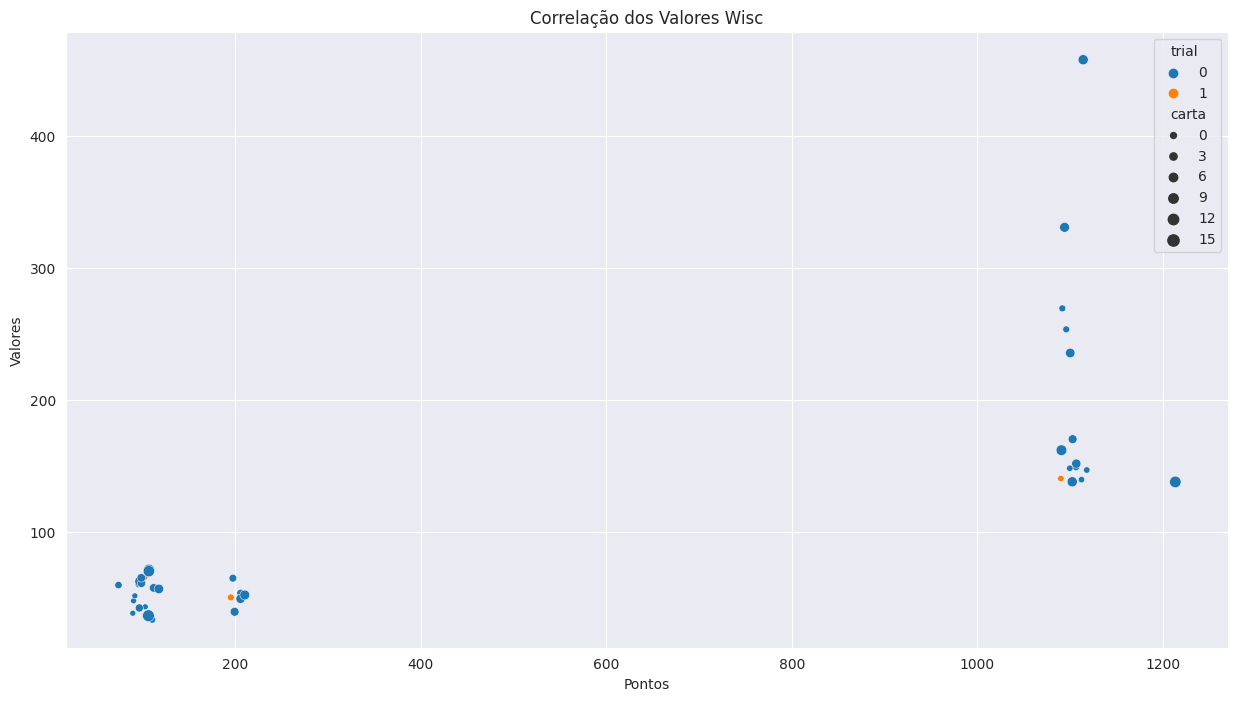

In [20]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
def jitter(values,j):
    return values + np.random.normal(j,10,values.shape)
cols = ['valor', 'ponto', 'carta']
dfwc[cols] = dfwc[cols].apply(pd.to_numeric, errors='coerce', axis=1)
# dfwc["ponto"] = pd.to_numeric(dfwc.ponto)
# pd.to_numeric(dfwc.valor)
_ = plt.figure(figsize=(15,8))
chart = sns.scatterplot(data=dfwc, x=jitter(dfwc.valor, 100), y=jitter(dfwc.ponto, 50), size="carta", hue="trial")
_ = chart.set(title='Correlação dos Valores Wisc', ylabel='Valores', xlabel="Pontos")

## Gráfico da contagem de valores do Wisc

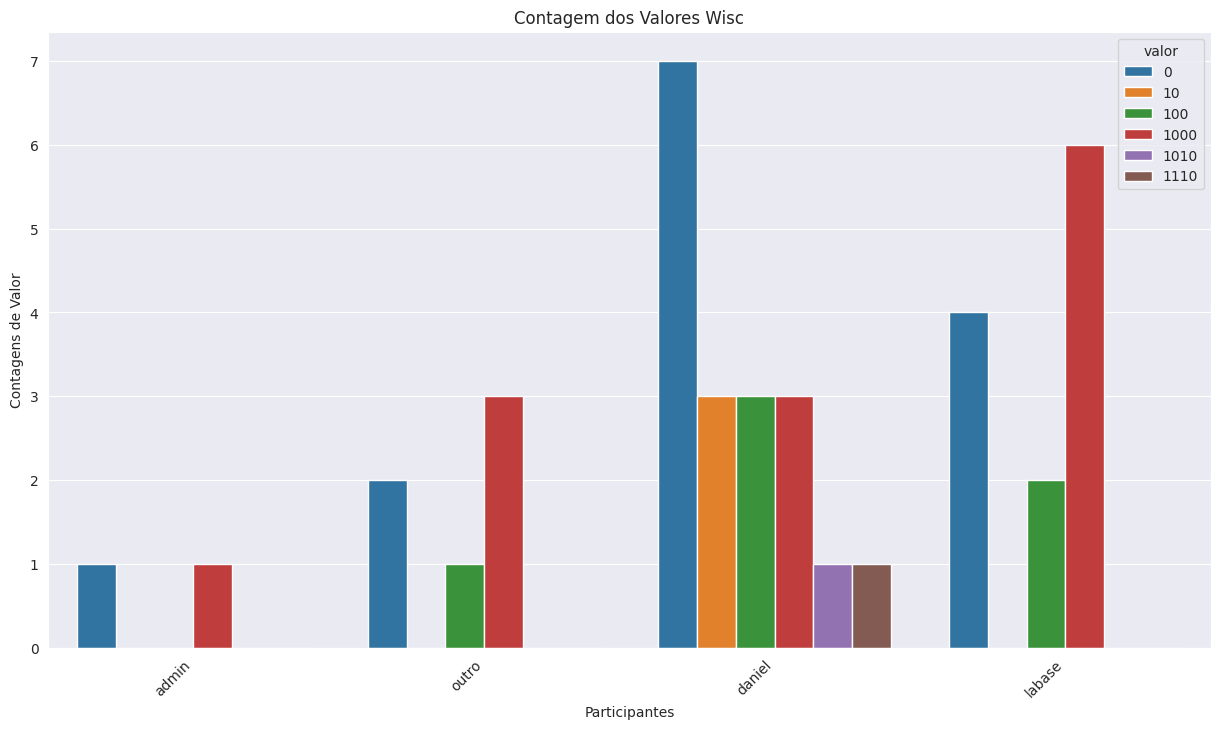

In [21]:
import seaborn as sns
from matplotlib import pyplot as plt
_ = plt.figure(figsize=(15,8))
chart = sns.countplot(data=dfwc, x="name", hue="valor")
_ = chart.set(title='Contagem dos Valores Wisc', ylabel='Contagens de Valor', xlabel="Participantes")
_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

## Limpeza dos nomes dos valores de carta e ponto no EICA

In [22]:
dfei = dfa.loc[dfa['game'] == 'game']
dfei['carta'] = [re.findall(r"__(.+?)__",text)[0] if text.startswith('_') else text for text in dfei.carta.to_list()]
dfei['ponto'] = [re.findall(r"_(.+?)_",text)[0] if text.startswith('_') else text for text in dfei.ponto.to_list()]

dfei

/tmp/ipykernel_154083/1376054935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfei['carta'] = [re.findall(r"__(.+?)__",text)[0] if text.startswith('_') else text for text in dfei.carta.to_list()]
/tmp/ipykernel_154083/1376054935.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfei['ponto'] = [re.findall(r"_(.+?)_",text)[0] if text.startswith('_') else text for text in dfei.ponto.to_list()]


,index,_id,name,game,goal,trial,carta,casa,move,ponto,valor,time
2,1,ObjectId('6477ce20f626d3cb95e08c8f'),admin,game,0,0,I_N_I_T,0_0,ok,INIT,True,2023-05-31 19:49:01.943000
3,1,ObjectId('6477ce20f626d3cb95e08c8f'),admin,game,0,0,A_T_I_V_A,0_0,ok,CHAVES,True,2023-05-31 19:49:08.206000
4,1,ObjectId('6477ce20f626d3cb95e08c8f'),admin,game,0,0,minitens,400_520,ok,ABAS,minitens,2023-05-31 19:49:11.043999
5,1,ObjectId('6477ce20f626d3cb95e08c8f'),admin,game,0,0,6,420_160,ok,Chaves,True,2023-05-31 19:49:13.635999
6,1,ObjectId('6477ce20f626d3cb95e08c8f'),admin,game,0,0,A_T_I_V_A,0_0,ok,CHAVES,False,2023-05-31 19:49:16.654000
...,...,...,...,...,...,...,...,...,...,...,...,...
106,10,ObjectId('647fa41a442f27c3f236c16c'),labase,game,0,0,31,340_448,ok,Mundo,True,2023-06-06 18:25:34.927000
107,10,ObjectId('647fa41a442f27c3f236c16c'),labase,game,0,0,31,340_448,ok,Mundo,True,2023-06-06 18:25:35.854000
108,10,ObjectId('647fa41a442f27c3f236c16c'),labase,game,0,0,31,340_448,ok,Mundo,True,2023-06-06 18:25:37.306999
109,10,ObjectId('647fa41a442f27c3f236c16c'),labase,game,0,0,31,340_448,ok,Mundo,True,2023-06-06 18:25:38.858000


## Gráfico de contagem de pontos EICA

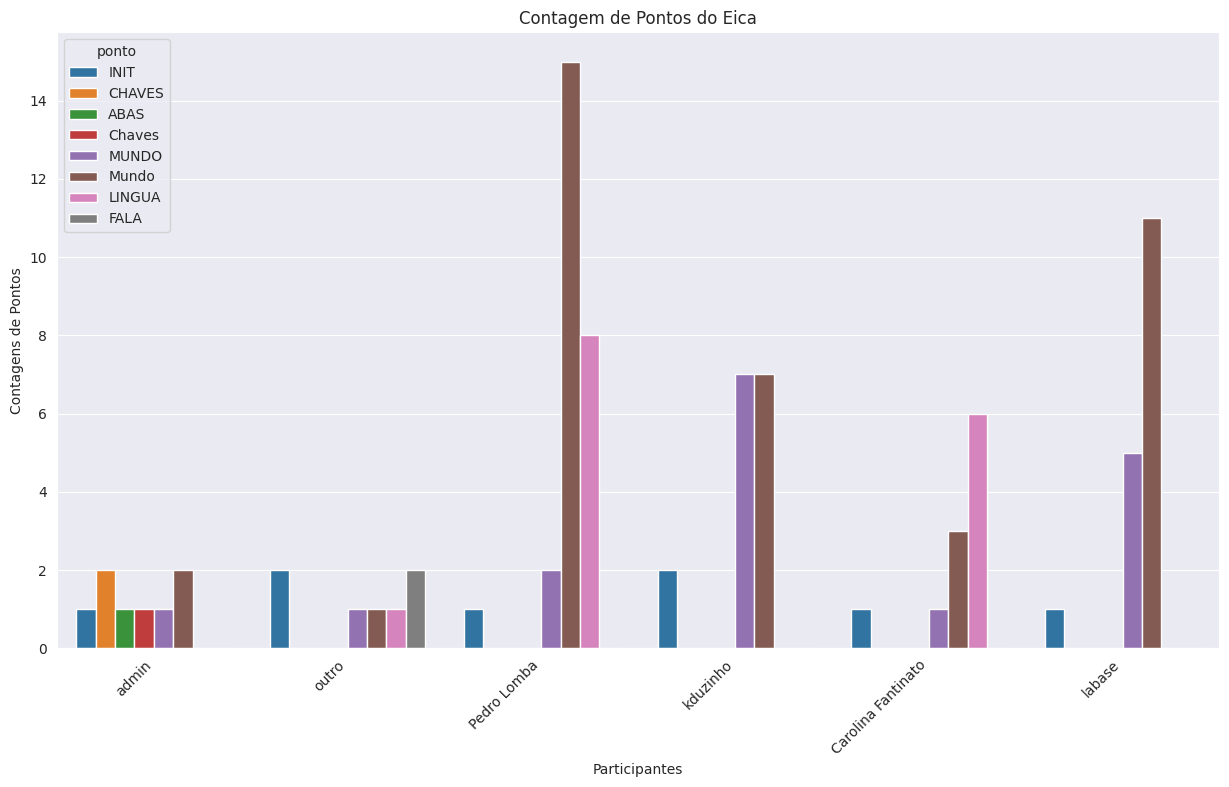

In [23]:
import seaborn as sns
from matplotlib import pyplot as plt
_ = plt.figure(figsize=(15,8))
chart = sns.countplot(data=dfei, x="name", hue="ponto")
_ = chart.set(title='Contagem de Pontos do Eica', ylabel='Contagens de Pontos', xlabel="Participantes")
_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

## Gráfico de contagem de cartas do EICA

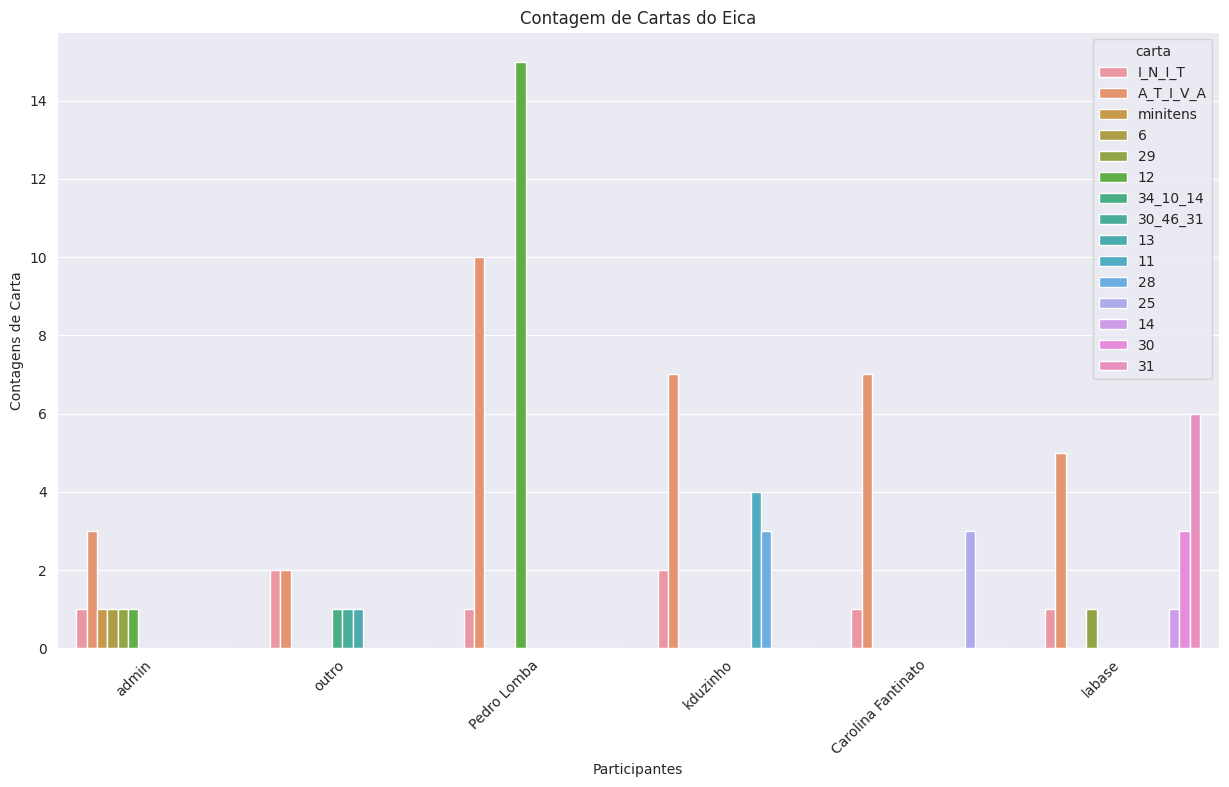

In [24]:
import seaborn as sns
from matplotlib import pyplot as plt
_ = plt.figure(figsize=(15,8))
chart = sns.countplot(data=dfei, x="name", hue="carta")
_ = chart.set(title='Contagem de Cartas do Eica', ylabel='Contagens de Carta', xlabel="Participantes")
_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')